# 1.  Import all librairies and datasets

In [176]:
# import all librairies needed for this model

import pandas as pd # for dataframe computaion
import numpy as np # vector computation
import matplotlib.pyplot as plt # for plot
import seaborn as sns # for plot
from sklearn.preprocessing import LabelEncoder, StandardScaler # for data preprocessing
from sklearn.linear_model import LogisticRegression  # for logistic regression
from sklearn.model_selection import train_test_split # for splitting and train and test datastet randomly
from sklearn.metrics import classification_report # for metrics and model evaluation
from sklearn.impute import SimpleImputer # for data preprocessing

In [177]:
# import dataset 
url_test = "datasets/test.csv"
url_train= "datasets/train.csv"

In [178]:
train_df = pd.read_csv(url_train)
test_df =  pd.read_csv(url_test)

# 2. Missing Values

In [179]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.1 Find % of null values

In [180]:
np.round(train_df.isna().sum()/train_df.shape[0],2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

## 2.2 Columns with drop values

In [181]:
removed_col = ['PassengerId','Cabin','Name','Survived','Ticket']

## 2.3  Preselected Features

In [182]:
preselected_cols = [col for col in train_df.columns if col not in ['PassengerId','Cabin']]
preselected_cols

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

## 2.4  Apply Simple Imputer

In [183]:
# SimpleImputer Embarked
train_df = train_df[preselected_cols]
simple_1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
values = simple_1.fit_transform(train_df[['Embarked']].values)
train_df['Embarked'] =  values

In [184]:
# SimpleImputer Age
simple_1 = SimpleImputer(missing_values=np.nan, strategy='median')
values = simple_1.fit_transform(train_df[['Age']].values)
train_df['Age'] =  values 

In [185]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 3. Verify well data types

In [186]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


# 4. Find Cateorigal values

In [187]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']


In [188]:
# code Sexe
map_sex = {'male':1,'female':0}
train_df['Sex_Code'] = train_df['Sex'].replace(map_sex)

In [189]:
# code Embarked
embarked_map = {'S':0,'C':1,'Q':2}
train_df['Embarked_Coded'] = train_df['Embarked'].replace(embarked_map)

In [190]:
col_cat = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
for col in col_cat:
    print(col, train_df[col].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q']


# 5. Find oultiers

In [191]:
col =['Age','Fare']
Q1 = train_df[col].describe().T['25%']
Q3 = train_df[col].describe().T['75%']
train_IQR = Q3-Q1
train_IQR


Age     13.0000
Fare    23.0896
dtype: float64

In [192]:
MIN_RANGE = Q1 - 1.5 * train_IQR
MAX_RANGE = Q3+ 1.5 *train_IQR
train_out = train_df[~((train_df[col] < MIN_RANGE) |(train_df[col] > MAX_RANGE)).any(axis =1)]
print(train_out.shape)
train_out.head()

(721, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Embarked_Coded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,1,2


In [193]:
percent_  =round( (train_out.shape[0] / train_df.shape[0]) *100,2)
percent_

80.92

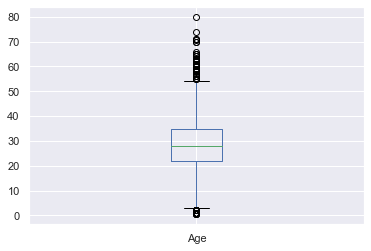

In [194]:
train_df[['Age']].boxplot()

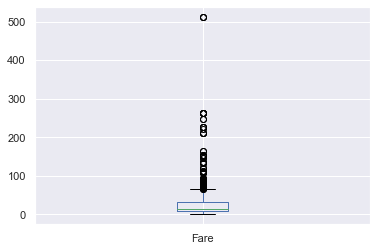

In [195]:
train_df[['Fare']].boxplot()

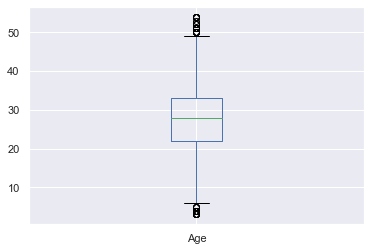

In [196]:
train_out[['Age']].boxplot()

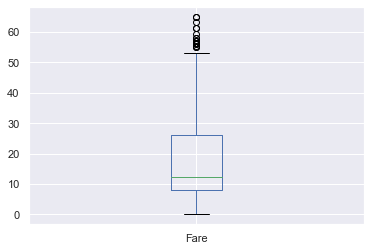

In [152]:
train_out[['Fare']].boxplot()

# 5. Removes duplicates

In [197]:
train_out.shape

(721, 12)

In [198]:
train_out.drop_duplicates(inplace=True)
train_out.shape

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(721, 12)

# 6. Exploratory Data Analysis

In [199]:
col_cat

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [156]:
for col in col_cat:
    display(train_df.groupby(col).size().to_frame().rename(columns={0:'count'}))

,count
Survived,
0,549
1,342


,count
Pclass,
1,216
2,184
3,491


,count
Sex,
female,314
male,577


,count
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


,count
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


,count
Embarked,
C,168
Q,77
S,646


In [201]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")


([<matplotlib.patches.Wedge at 0x2479d67e288>,
 [Text(1.091169061697994, 0.49934965584559987, 'C'),
  Text(0.4719991774020479, 0.9935878303058016, 'Q'),
  Text(-0.8426488175527445, -0.7070664539326992, 'S')],
 [Text(0.6365152859904966, 0.2912872992432666, '13.7%'),
  Text(0.25745409676475334, 0.541956998348619, '8.6%'),
  Text(-0.45962662775604235, -0.3856726112360177, '77.8%')])

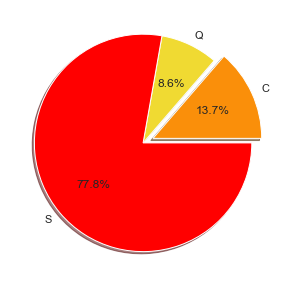

In [202]:

# Survivded
df =train_df[train_df.Survived == 0].groupby(['Embarked']).size().to_frame().rename(columns={0:'count'}).reset_index()
labels=df['Embarked'] 
values= df['count']
colors = ['#FA8F0A','#F0DA32','red']
plt.figure(figsize=(10,5))
explode = (0.1, 0,0)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)

([<matplotlib.patches.Wedge at 0x2479da3c808>,
 [Text(1.0733844937337091, 0.5365125614671377, 'female'),
  Text(-0.9839357859225668, -0.49180318134487605, 'male')],
 [Text(0.626140954677997, 0.3129656608558302, '14.8%'),
  Text(-0.5366922468668546, -0.2682562807335687, '85.2%')])

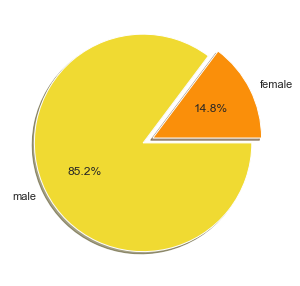

In [203]:
df =train_df[train_df.Survived == 0].groupby(['Sex']).size().to_frame().rename(columns={0:'count'}).reset_index()
labels= df['Sex']
values= df['count']
colors = ['#FA8F0A','#F0DA32']
explode = (0.1, 0)
plt.figure(figsize=(10,5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)


([<matplotlib.patches.Wedge at 0x2479da8a488>,
 [Text(1.0764370529718539, 0.5303614531517825, '1'),
  Text(0.10997203302849645, 1.0944889912427533, '2'),
  Text(-0.582377329516148, -0.9331862869039815, '3')],
 [Text(0.6279216142335814, 0.30937751433853977, '14.6%'),
  Text(0.05998474528827079, 0.5969939952233199, '17.7%'),
  Text(-0.3176603615542625, -0.5090107019476262, '67.8%')])

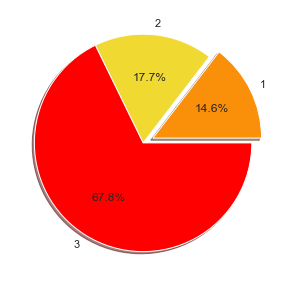

In [204]:

# Survivded
df =train_df[train_df.Survived == 0].groupby(['Pclass']).size().to_frame().rename(columns={0:'count'}).reset_index()
labels=df['Pclass'] 
values= df['count']
colors = ['#FA8F0A','#F0DA32','red']
plt.figure(figsize=(10,5))
explode = (0.1, 0,0)
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, shadow=True)

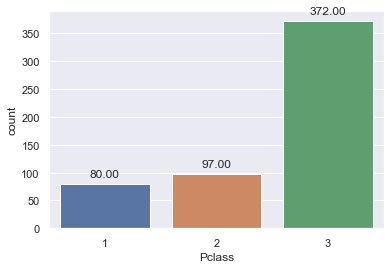

In [205]:
df =train_df[train_df.Survived == 0].groupby(['Pclass']).size().to_frame().rename(columns={0:'count'}).reset_index()
splot = sns.barplot(data=df, x = 'Pclass', y= 'count', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [208]:
col_num = [x for x in train_df.columns if x not in col_cat+['Name','Ticket','Sex_Code','Embarked_Coded']]
col_num

['Age', 'Fare']

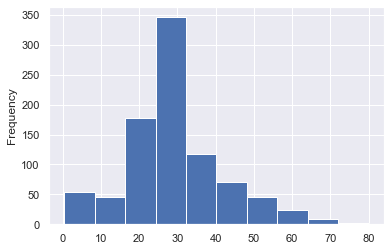

In [209]:
df_num = train_df[col_num]
df_num[col_num[0]].plot(kind='hist')

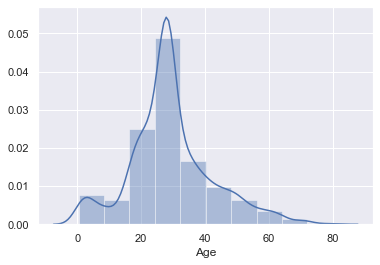

In [211]:
sns.distplot(df_num[col_num[0]], bins=10, kde=True);

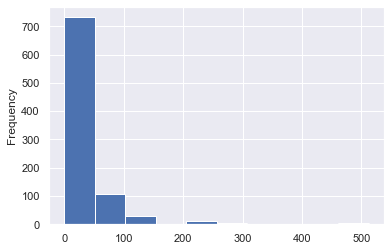

In [212]:
df_num = train_df[col_num]
df_num[col_num[1]].plot(kind='hist')

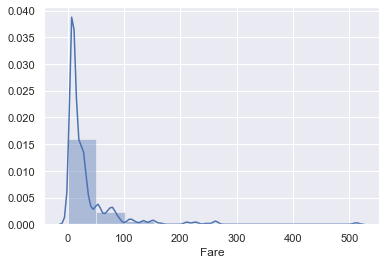

In [166]:
sns.distplot(df_num[col_num[1]], bins=10, kde=True);

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


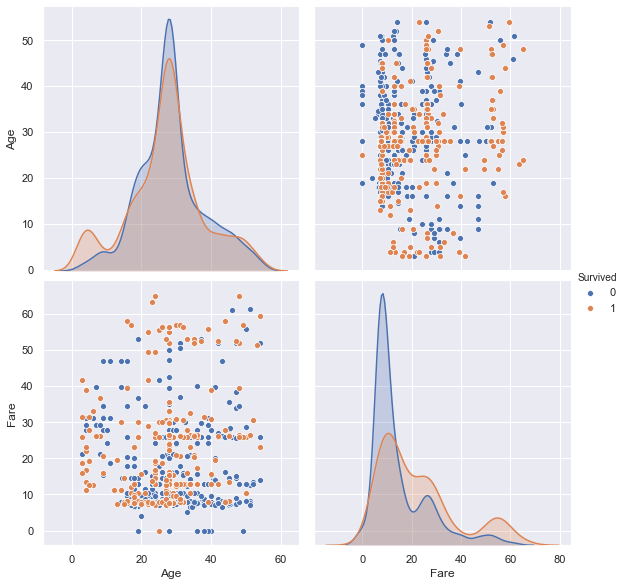

In [167]:
ax = sns.pairplot(train_out[['Age','Fare','Survived']],hue='Survived',size =4,height =4)


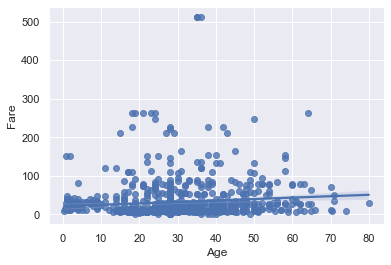

In [213]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=col_num[0], y=col_num[1], data=df_num)

In [214]:
train_out.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Coded
Survived,1.000000,-0.273088,-0.061061,0.004221,0.079950,0.260557,-0.510246,0.093718
Pclass,-0.273088,1.000000,-0.302299,0.081216,0.064847,-0.593781,0.048046,0.140829
Age,-0.061061,-0.302299,1.000000,-0.284694,-0.124248,0.101123,0.091495,-0.062940
SibSp,0.004221,0.081216,-0.284694,1.000000,0.392674,0.370951,-0.157456,-0.043605
Parch,0.079950,0.064847,-0.124248,0.392674,1.000000,0.335415,-0.295532,-0.059111
Fare,0.260557,-0.593781,0.101123,0.370951,0.335415,1.000000,-0.164606,-0.088051
Sex_Code,-0.510246,0.048046,0.091495,-0.157456,-0.295532,-0.164606,1.000000,-0.127467
Embarked_Coded,0.093718,0.140829,-0.062940,-0.043605,-0.059111,-0.088051,-0.127467,1.000000


In [215]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Code,Embarked_Coded
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.106811
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.045702
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.009165
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.059961
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.078665
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,0.062142
Sex_Code,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.116569
Embarked_Coded,0.106811,0.045702,-0.009165,-0.059961,-0.078665,0.062142,-0.116569,1.000000


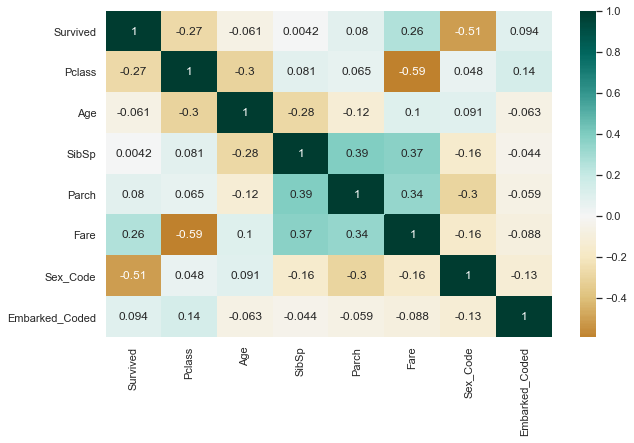

In [216]:
#Step5: Annotate each cell with the numeric value
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train_out.corr(), center=0, cmap='BrBG', annot=True) 

In [218]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(train_df[train_df.Survived ==1 ]['Fare'], train_df[train_df.Survived ==0]['Fare'])
print(fvalue, pvalue)

63.03076422804448 6.120189341921873e-15


In [174]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Code,Embarked_Coded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [114]:
map_dict = dict(variale_name =[],variable_scope=[],head =[])

In [290]:
train_copy =train_df.copy()

In [291]:
col =['Survived']
index_col = ['Pclass','Age','Parch','Fare','SlibSp']

In [292]:
def age_range(x):
    if x>=0 and x<18:
        return 'Children'
    elif x>=18 and x < 65:
        return 'Adults'
    else:
        return 'Old age'

In [313]:
def cut_fare(x):
    return pd.cut(x,4, labels=["Platinium", "Gold", "Silver","Broze"][::-1])



In [314]:
train_copy =train_df.copy()

In [315]:
train_copy['Age_cat'] = train_copy['Age'].apply(lambda x: age_range(x)) 

In [316]:
train_copy['Fare_cat'] =  cut_fare(train_copy['Fare'].values )

In [317]:
train_copy['count'] =1

In [318]:
column_profile = ['Pclass','Age_cat','Parch','Fare_cat','SibSp','count','Survived','Sex']

In [319]:
df1= train_copy.pivot_table(index =['Sex'],columns =['Survived'],values='count',aggfunc=np.mean(), fill_value=0)

In [320]:
df2= train_copy.pivot_table(index =['Age_cat'],columns =['Survived'],values='count',aggfunc=np.mean(), fill_value=0)

In [321]:
df2

Survived,0,1
Age_cat,,
Adults,487,280
Children,52,61
Old age,10,1


In [322]:
df3= train_copy.pivot_table(index =['Parch'],columns =['Survived'],values='count',aggfunc=np.mean(), fill_value=0)

In [323]:
df3

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [331]:
df4= train_copy.pivot_table(index =['Fare_cat'],columns =['Survived'],values='count',aggfunc=np.mean, fill_value=0)

In [332]:
df4

Survived,0,1
Fare_cat,,
Broze,1,1
Silver,1,1
Gold,1,1
Platinium,0,1


In [328]:
df5= train_copy.pivot_table(index =['SibSp'],columns =['Survived'],values='count',aggfunc=np.sum, fill_value=0)

In [329]:
df5

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [333]:
df_final = pd.DataFrame(None ,columns=['VariableName','Categorie','Columns'])

In [334]:
df_final.head()

,VariableName,Categorie,Columns


In [412]:
df = train_copy[['Sex','Survived']].groupby(['Sex','Survived'],as_index=True).size().to_frame().reset_index().rename(columns ={0:'Count'})
df['var_name'] = 'Sex'
df.rename(columns = {'Sex': 'Categ'},inplace=True)

In [413]:
df1 = train_copy[['Fare_cat','Survived']].groupby(['Fare_cat','Survived'],as_index=True).size().to_frame().reset_index().rename(columns ={0:'Count'})
df1['var_name'] = 'Fare_cat'
df1.rename(columns = {'Fare_cat': 'Categ'},inplace=True)

In [414]:
df2 = train_copy[['Age_cat','Survived']].groupby(['Age_cat','Survived'],as_index=True).size().to_frame().reset_index().rename(columns ={0:'Count'})
df2['var_name'] = 'Age_cat'
df2.rename(columns = {'Age_cat': 'Categ'},inplace=True)

In [415]:
df3 = train_copy[['Age_cat','Survived']].groupby(['Age_cat','Survived'],as_index=True).size().to_frame().reset_index().rename(columns ={0:'Count'})
df3['var_name'] = 'Age_cat'
df3.rename(columns = {'Age_cat': 'Categ'},inplace=True)
df3

,Categ,Survived,Count,var_name
0,Adults,0,487,Age_cat
1,Adults,1,280,Age_cat
2,Children,0,52,Age_cat
3,Children,1,61,Age_cat
4,Old age,0,10,Age_cat
5,Old age,1,1,Age_cat


In [416]:
df4 = train_copy[['Parch','Survived']].groupby(['Parch','Survived'],as_index=True).size().to_frame().reset_index().rename(columns ={0:'Count'})
df4['var_name'] = 'Parch'
df4.rename(columns = {'Parch': 'Categ'},inplace=True)
df4

,Categ,Survived,Count,var_name
0,0,0,445,Parch
1,0,1,233,Parch
2,1,0,53,Parch
3,1,1,65,Parch
4,2,0,40,Parch
5,2,1,40,Parch
6,3,0,2,Parch
7,3,1,3,Parch
8,4,0,4,Parch
9,5,0,4,Parch


In [417]:
df5 = train_copy[['Age','Survived']].groupby(['Survived'],as_index=True).Age.mean().to_frame().reset_index().rename(columns ={'Age':'Count'})
df5['var_name'] = 'Age moyen'
df5.rename(columns = {'Age': 'Categ'},inplace=True)
df5['Categ']= 'Age moyen'
df5

,Survived,Count,var_name,Categ
0,0,30.028233,Age moyen,Age moyen
1,1,28.291433,Age moyen,Age moyen


In [418]:
df2 = pd.concat([df,df1,df2,df3,df4,df5])

C:\Users\Yvel Marcelin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [419]:
df2

,Categ,Count,Survived,var_name
0,female,81.000000,0,Sex
1,female,233.000000,1,Sex
2,male,468.000000,0,Sex
3,male,109.000000,1,Sex
0,Broze,539.000000,0,Fare_cat
1,Broze,314.000000,1,Fare_cat
2,Silver,8.000000,0,Fare_cat
3,Silver,21.000000,1,Fare_cat
4,Gold,2.000000,0,Fare_cat
5,Gold,4.000000,1,Fare_cat


In [420]:
df3 =df2.pivot_table(index =['var_name','Categ'],columns=['Survived'],values ='Count',aggfunc =np.sum,fill_value =0)

In [421]:
df3

Survived                      0           1
var_name  Categ                            
Age moyen Age moyen   30.028233   28.291433
Age_cat   Adults     974.000000  560.000000
          Children   104.000000  122.000000
          Old age     20.000000    2.000000
Fare_cat  Broze      539.000000  314.000000
          Gold         2.000000    4.000000
          Platinium    0.000000    3.000000
          Silver       8.000000   21.000000
Parch     0          445.000000  233.000000
          1           53.000000   65.000000
          2           40.000000   40.000000
          3            2.000000    3.000000
          4            4.000000    0.000000
          5            4.000000    1.000000
          6            1.000000    0.000000
Sex       female      81.000000  233.000000
          male       468.000000  109.000000

In [383]:
df3.to_csv('profile.csv')

In [ ]:
df2 = train_copy[['Parch','Survived']].groupby(['Parch','Survived'],as_index=True).size().to_frame().reset_index().rename(columns ={0:'Count'})
df2['var_name'] = 'Parch'
df2.rename(columns = {'Parch': 'Categ'},inplace=True)